# Numpy, Matplotlib e integración de servicios para aplicaciones gráficas
Combinar las librerías científicas con un ambiente gráfico permite implementar una aplicación que puede gestionar información de manera más interactiva, por lo que se puede tener ambientes más interactivos que solamente basandose en las librerías científicas. Vamos a integrar los diferentes modulos (Jupyter + tkinter + numpy + matplotlib) para obtener resultados interactivos visualmente atractivos.

## Numpy y matplotlib: las librerías científicas
Algunos ejemplos de uso de las librerías `numpy` y `matplotlib` para resolver problemas científicos:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Problema 1
En un circuito RLC serie con una fuente de voltaje AC, la amplitud de la corriente I esta dada por:

$$I =\frac{v_m}{\sqrt{R^2+ (\omega_dL - 1/(\omega_dC))^2}}$$

donde $\omega_d = 2 \pi f_d$, en el que $fd$ es la frecuencia de la fuente; R, C y L son la resistencia, la capacitancia y la inductancia, respectivamente; y $v_m$ es la amplitud de V. Para el circuito se tienen los siguientes valores:

R = 80 ohm, C = 18 uF, L = 260 mH y $v_m$ = 10 V

Muestre un gráfico de *I* en función de $f_d$ para $10 \le f \le 10000 Hz$. Use escala lineal para I y escala logarítmica para $f_d$

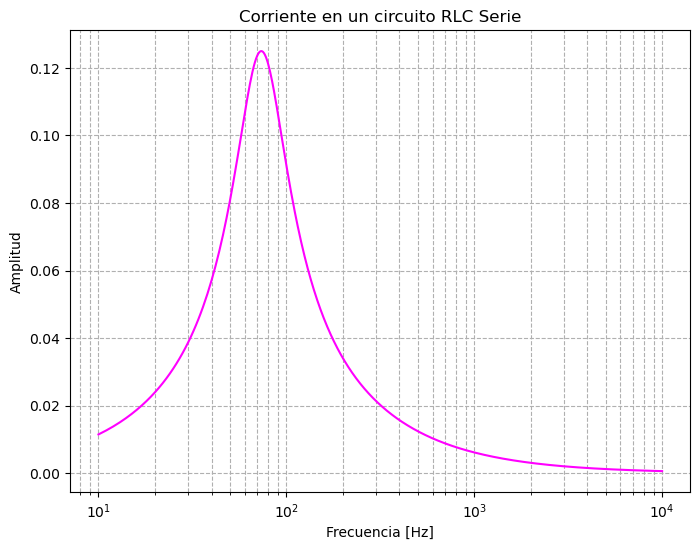

In [2]:
R = 80
C = 18e-6
L = 260e-3
vm = 10

fd = np.arange(10, 10000)
wd = 2 * np.pi * fd

I = vm / np.sqrt(R**2 + (wd * L - 1/(wd * C))**2)

plt.figure(figsize=(8, 6))
plt.semilogx(fd, I, color='magenta')
plt.title("Corriente en un circuito RLC Serie")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.grid(linestyle="dashed", which='both')
plt.show()

### Problema 2
La distribución de velocidad, $N(v)$, de las moléculas de un gas puede ser modelado por la ley de distribución de velocidad de Maxwell:

$$ N(v) = 4\pi ({\frac{m}{2 \pi kT}})^{3/2} v^2 e^{\frac{-mv^2}{2kT}} $$

donde _m_(kg) es la masa de cada molécula, _v_(m/s) es la velocidad, _T_(K) es la temperatura, y _k_ = $1.38x10^23$ J/K es la constante de Boltzmann. Muestre una gráfica de _N(v)_ versus _v_ para $0 \le v \le 1200$ m/s para las moléculas de oxígeno (_m_ = $5.3 x 10^-26$ kg). Muestre dos resultados en la misma gráfica, uno para T = 80K y el otro para T = 300K. Etiquete los ejes y muestre una leyenda.

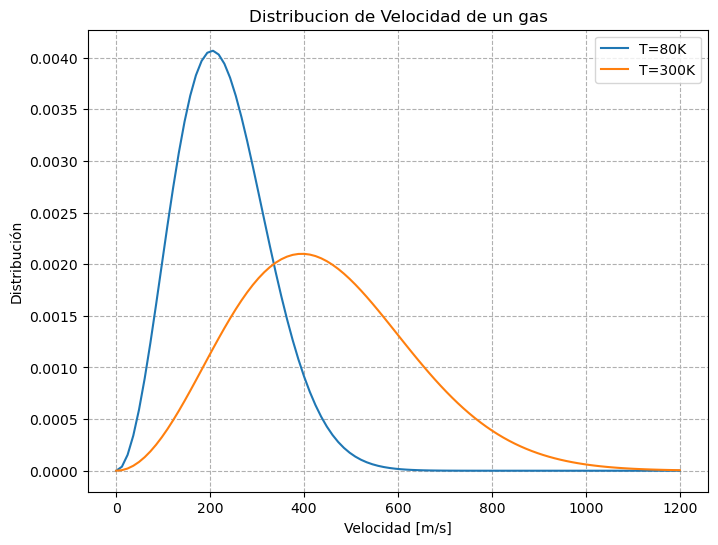

In [3]:
k = 1.38e-23
m = 5.3e-26
v = np.linspace(0, 1200, 100)

plt.figure(figsize=(8, 6))

T = 80
N = (4 * np.pi) * ((m / (2 * np.pi * k * T))**(3/2)) * (v**2 * np.exp((-m * v**2) / (2 * k * T)))
plt.plot(v, N, label="T=80K")

T = 300
N = (4 * np.pi) * ((m / (2 * np.pi * k * T))**(3/2)) * (v**2 * np.exp((-m * v**2) / (2 * k * T)))
plt.plot(v, N, label="T=300K")

plt.title("Distribucion de Velocidad de un gas")
plt.xlabel("Velocidad [m/s]")
plt.ylabel("Distribución")
plt.legend()
plt.grid(linestyle="--")
plt.show()

## Uso de matplotlib con objetos graficos (fig, ax)
![matplotlib graph elements](https://matplotlib.org/3.1.1/_images/sphx_glr_anatomy_001.png)

Cuando se llama a las instrucciones graficas, como `plt.title()` lo que realmente sucede tras la cortina es la inspección del gráfico (llamado _axes_) para llamar a un setter llamado `set_title`. Esta es la forma de interactuar con la librería gráfica directamente con los objetos gráficos. Esto suele ser más complejo, pero se tiene un control más fino de las propiedades de un gráfico

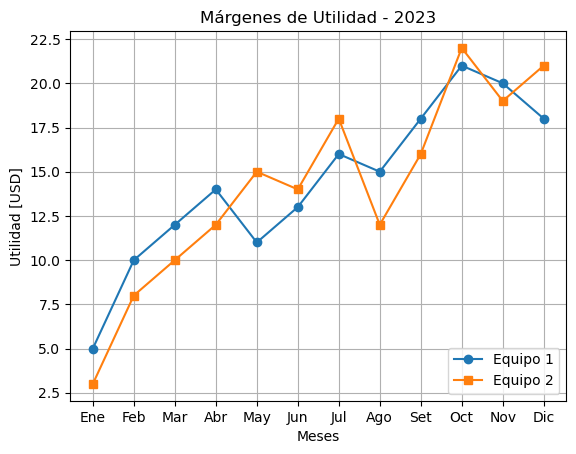

In [4]:
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
        'Jul', 'Ago', 'Set', 'Oct', 'Nov', 'Dic']
equipo1 = [5, 10, 12, 14, 11, 13, 16, 15, 18, 21, 20, 18]
equipo2 = [3, 8, 10, 12, 15, 14, 18, 12, 16, 22, 19, 21]

fig, ax = plt.subplots()
ax.plot(meses, equipo1, marker='o', label='Equipo 1')
ax.plot(meses, equipo2, marker='s', label='Equipo 2')
ax.set_title("Márgenes de Utilidad - 2023")
ax.set_xlabel("Meses")
ax.set_ylabel("Utilidad [USD]")
ax.legend(loc='lower right')
ax.grid()
plt.show()

La ventaja de utilizar esta metodología orientada a objetos es que se pueden hacer modificaciones sobre el gráfico resultantes (es decir, sobre el Axes), afectando a los objetos gráficos. Por ejemplo, se puede modificar (a traves de algun proceso en un script) el color de una línea sin tener que volver a escojer el Axes generado, volver a graficar todo y refrescar la figura (lo que se tendría que hacer con la forma "implicita" de trabajar); lo que haremos es obtener el objeto gráfico "Line2D" que es parte del Axes y afectar una de sus propiedades.

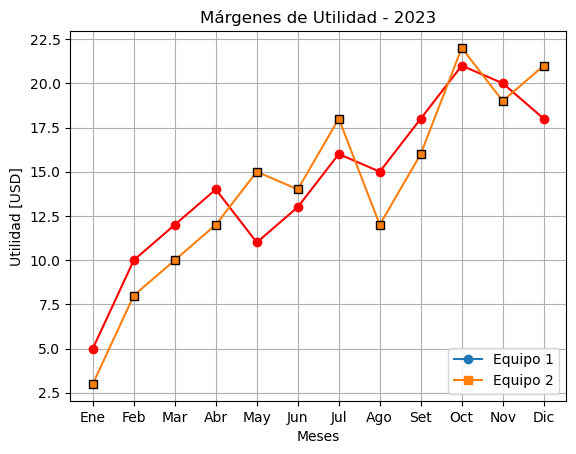

In [5]:
line1, line2 = ax.get_lines()
line1.set_color('red')
line2.set_markeredgecolor('black')
fig

Así también, podemos tener un grado de personalización del gráfico completo ya que se pueden modificar todos los objetos gráficos. Por ejemplo, los spines (las líneas que enmarcan un Axes) solo se pueden editar por medio de setters sobre un objeto Axes:

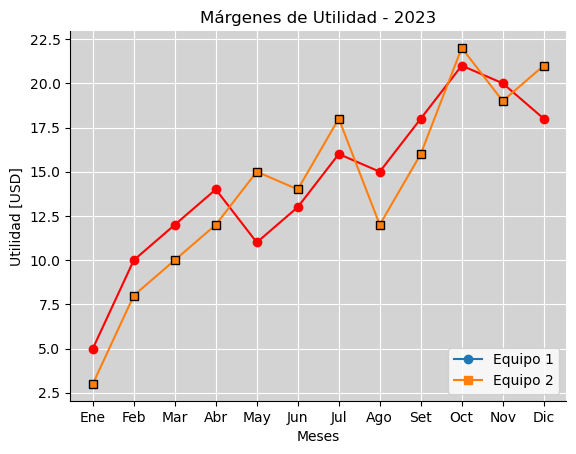

In [6]:
ax.set_facecolor('lightgray')
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.grid(color='white')
fig

Tambien podemos definir varios Axes sobre una misma figura asignando las propiedades al método plt.subplots():

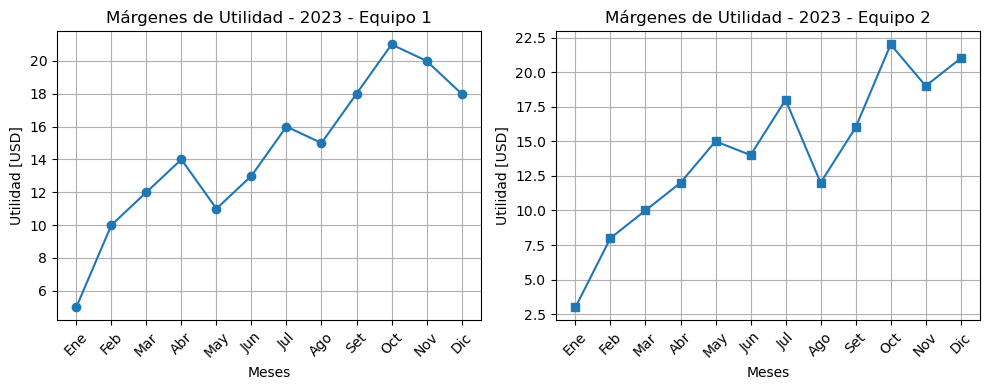

In [7]:
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
        'Jul', 'Ago', 'Set', 'Oct', 'Nov', 'Dic']
equipo1 = [5, 10, 12, 14, 11, 13, 16, 15, 18, 21, 20, 18]
equipo2 = [3, 8, 10, 12, 15, 14, 18, 12, 16, 22, 19, 21]

# Definición de una tupla de Axes (desempaquetada): ax[row|col]
fig, (ax1, ax2) = plt.subplots(figsize=(10, 4), dpi=100, nrows=1, ncols=2) # dpi: pixels por pulgada (100 por defecto)

ax1.plot(meses, equipo1, marker='o')
ax1.set_title("Márgenes de Utilidad - 2023 - Equipo 1")
ax1.set_xlabel("Meses")
ax1.set_ylabel("Utilidad [USD]")
ax1.xaxis.set_tick_params(rotation=45)   # ax1.tick_params(axis='x', rotation=45)
ax1.grid()

ax2.plot(meses, equipo2, marker='s')
ax2.set_title("Márgenes de Utilidad - 2023 - Equipo 2")
ax2.set_xlabel("Meses")
ax2.set_ylabel("Utilidad [USD]")
ax2.xaxis.set_tick_params(rotation=45)
ax2.grid()

plt.tight_layout()
plt.show()

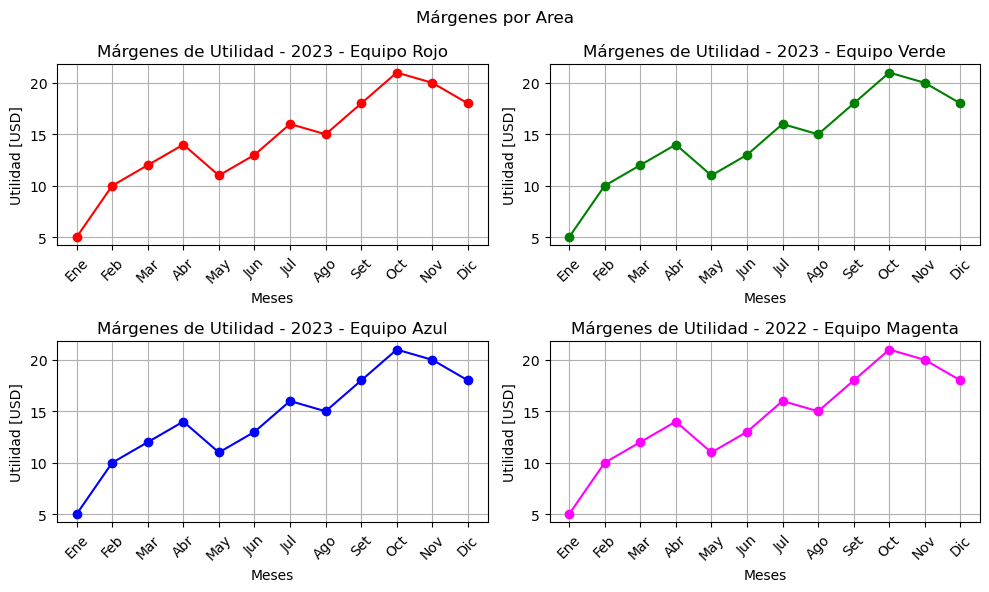

In [8]:
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
        'Jul', 'Ago', 'Set', 'Oct', 'Nov', 'Dic']
equipo1 = [5, 10, 12, 14, 11, 13, 16, 15, 18, 21, 20, 18]
equipo2 = [3, 8, 10, 12, 15, 14, 18, 12, 16, 22, 19, 21]

# Definición de una tupla de tuplas de Axes (desempaquetada nrows x ncols): ax[row][col]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(10, 6), dpi=100, nrows=2, ncols=2)

fig.suptitle("Márgenes por Area")

ax1.plot(meses, equipo1, marker='o', color='red')
ax1.set_title("Márgenes de Utilidad - 2023 - Equipo Rojo")
ax1.set_xlabel("Meses")
ax1.set_ylabel("Utilidad [USD]")
ax1.xaxis.set_tick_params(rotation=45)   # ax1.tick_params(axis='x', rotation=45)
ax1.grid()

ax2.plot(meses, equipo1, marker='o', color='green')
ax2.set_title("Márgenes de Utilidad - 2023 - Equipo Verde")
ax2.set_xlabel("Meses")
ax2.set_ylabel("Utilidad [USD]")
ax2.xaxis.set_tick_params(rotation=45)
ax2.grid()

ax3.plot(meses, equipo1, marker='o', color='blue')
ax3.set_title("Márgenes de Utilidad - 2023 - Equipo Azul")
ax3.set_xlabel("Meses")
ax3.set_ylabel("Utilidad [USD]")
ax3.xaxis.set_tick_params(rotation=45)
ax3.grid()

ax4.plot(meses, equipo1, marker='o', color='magenta')
ax4.set_title("Márgenes de Utilidad - 2022 - Equipo Magenta")
ax4.set_xlabel("Meses")
ax4.set_ylabel("Utilidad [USD]")
ax4.xaxis.set_tick_params(rotation=45)
ax4.grid()

plt.tight_layout()
plt.show()

Así tambien, por ejemplo, se pueden obtener ciertos resultados gráficos utilizando esta metodología que no se podrían obtener por medio de la forma "implícita":

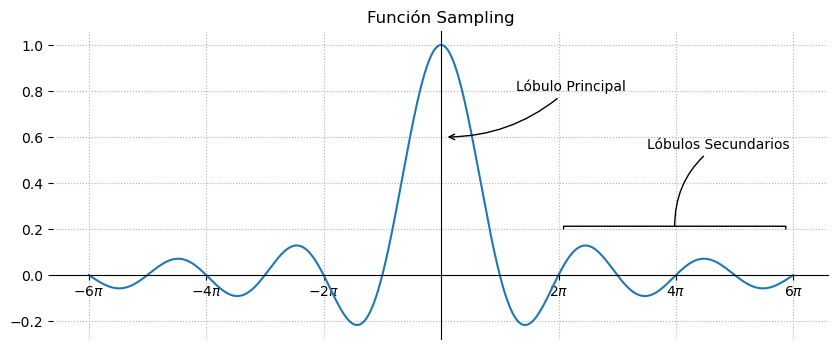

In [9]:
x = np.arange(-6 * np.pi, 6 * np.pi, 0.01)
y = np.sin(x) / x

fig, ax = plt.subplots(figsize=(10, 4), dpi=100)
ax.plot(x, y)
ax.set_title("Función Sampling")

# Ajuste de los ejes coordenados (spines)
ax.spines.top.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.bottom.set_position(('data', 0))
ax.spines.right.set_position(('data', 0))

# Ajuste de los xtick labels a valores especifico y LaTeX
ax.set_xticks([-6*np.pi, -4*np.pi, -2*np.pi, 2*np.pi, 4*np.pi, 6*np.pi])
ax.set_xticklabels(['$-6\\pi$', '$-4\\pi$', '$-2\\pi$', '$2\\pi$', '$4\\pi$', '$6\\pi$'])

# Anotaciones gráficas en en Axes
ax.annotate("Lóbulo Principal", xy=(0.2, 0.6), xytext=(4, 0.8), arrowprops=dict(arrowstyle='->', 
                                                                              connectionstyle="arc3, rad=-0.2"))
ax.annotate("Lóbulos Secundarios", xy=(12.5, 0.2), xytext=(11, 0.55), arrowprops=dict(arrowstyle='-[, widthB=8', 
                                                                              connectionstyle="arc3, rad=0.27"))
ax.grid(linestyle=':')

---
## tkinter Canvas: interacción con eventos generados por el usuario
Un `canvas` es un widget que permite incluír gráficos en el GUI. Se pueden incluir figuras geométricas que se definen por código e inclusive incrustar una imágen, así como interactuar con el usuario.

In [10]:
import tkinter as tk
import tkinter.ttk as ttk
from random import randrange

class App(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Tk Animation App")
        
        self.WIDTH = 300
        self.HEIGHT = 400
        self.SIZE = 15
  
        self.x = randrange(1, self.WIDTH - self.SIZE - 1) 
        self.y = randrange(1, self.HEIGHT - self.SIZE - 1)
        self.canvas = tk.Canvas(self, bg='white', 
                                width=self.WIDTH, height=self.HEIGHT)
        self.canvas.pack()

        self.ball = self.canvas.create_oval(self.x, self.y, 
                                            self.x + self.SIZE, self.y + self.SIZE, 
                                            fill='red')
        self.canvas.bind("<Button-1>", self.update_graph)

        
    def update_graph(self, event):
        xmouse, ymouse = event.x, event.y
        
        if self.x < xmouse < (self.x + self.SIZE) and self.y < ymouse < (self.y + self.SIZE):
            self.canvas.delete(self.ball)
            self.x, self.y = randrange(0, self.WIDTH), randrange(0, self.HEIGHT)
            self.ball = self.canvas.create_oval(self.x, self.y, 
                                                self.x + self.SIZE, self.y + self.SIZE, 
                                                fill='red')


App().mainloop()

## tkinter: programación de acciones con `after`
Muchos widgets tienen un método llamado `after` que mantiene un temporizador asociado a este. Cada vez que se llama al método, se establece un cronómetro y una vez vebcido el tiempo se invoca a otro método o función.

In [11]:
import customtkinter as ctk
from datetime import datetime

class App(ctk.CTk):
    def __init__(self):
        super().__init__()
        self.title("Clock")
        self.resizable(0, 0)
        
        ctk.set_appearance_mode('dark')
        FONT = {'font': ('Digital-7 Mono', 50, 'bold'), 'text_color': ('white', 'gray75')}
        
        self.lblHora = ctk.CTkLabel(self, text=f"{datetime.now():%H:%M:%S}", **FONT)
        self.lblHora.pack(padx=10, pady=10)
        
        self.update_clock()
        
        
    def update_clock(self):
        self.lblHora.configure(text=f"{datetime.now():%H:%M:%S}")
        self.after(500, self.update_clock)
        
        
App().mainloop()

Utilizando el método `after`, se pueden temporizar varios procesos de forma simultanea en el mismo GUI. Podemos utilizar la librería `psutil` que retorna información sobre el hardware del sistema y monitorearlo utilizando una aplicación gráfica.

In [12]:
import psutil

print(f"Uso del CPU [%]: {psutil.cpu_percent()}")
print(f"Velocidad del CPU [Mhz]: {psutil.cpu_freq().current:,}")
print(f"Memoria instalada [Mb]: {psutil.virtual_memory().total / 1e6:,}")
print(f"Battery [%]: {psutil.sensors_battery().percent}")

Uso del CPU [%]: 1.9
Velocidad del CPU [Mhz]: 2,100.0
Memoria instalada [Mb]: 7,928.078336
Battery [%]: 100


In [13]:
import psutil
import tkinter as tk
import tkinter.ttk as ttk

class App(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("CPU Data")
        self.resizable(0, 0)

        self.var_usage_CPU = tk.DoubleVar()
        self.var_battery_percent = tk.IntVar(value=50)

        frm = tk.Frame(self)
        frm.pack(padx=10, pady=10)
        
        self.lblCPU_Usage = tk.Label(frm, text="", font="Arial 16 bold")
        self.lblBAT_Usage = tk.Label(frm, text="", font="Arial 16 bold")

        self.lblCPU_Usage.grid(row=0, column=0, padx=5, pady=5, sticky=tk.W)
        self.lblBAT_Usage.grid(row=1, column=0, padx=5, pady=5, sticky=tk.W)

        self.read_psutil_data()


    def read_psutil_data(self):
        self.var_usage_CPU.set(psutil.cpu_percent())
        self.var_battery_percent.set(psutil.sensors_battery().percent)
        self.lblCPU_Usage.config(text=f"CPU Usage: {self.var_usage_CPU.get()}%")
        self.lblBAT_Usage.config(text=f"Battery Available: {self.var_battery_percent.get()}%")
        
        if psutil.sensors_battery().power_plugged:
            self.lblBAT_Usage.config(fg='black');
        else:
            self.lblBAT_Usage.config(fg='red');
        
        self.after(1000, self.read_psutil_data)


app = App().mainloop()

## matplotlib en tkinter
Se puede insertar un gráfico de matplotlib en una interface tkinter, utilizando el objeto `FigureCanvasTkAgg`. Esto permite crear una figura que recibirá el `Figure` de matplotlib y lo convertirá en un widget tipo `Canvas`.

Posteriormente, este canvas de puede actualizar con el método `draw`. Los cambios en la gráfica se hacen directamente sobre la información de los arreglos a plotear.

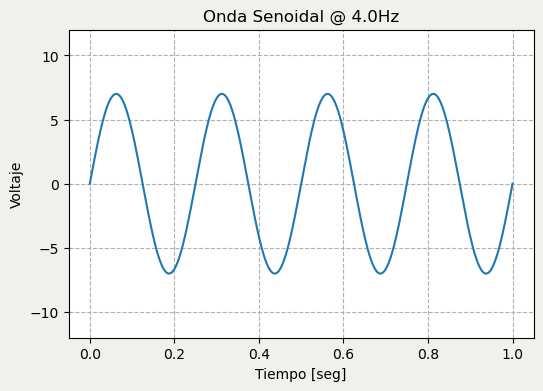

In [14]:
import tkinter.ttk as ttk
import tkinter as tk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class App(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Onda Senoidal")
        
        frm = tk.Frame(self)
        frm.pack(padx=10, pady=10)
        
        self.freq = tk.IntVar(value=1)
        self.amp = tk.DoubleVar(value=6.0)
        self.Y_LIMIT = 12
        self.FREQ_MAX = 10
        
        frm1 = tk.Frame(frm)
        frm2 = tk.Frame(frm)
        frm1.pack(padx=10, pady=10)
        frm2.pack(padx=10, pady=10)
        
        frmAmp = tk.LabelFrame(frm2, text="Amplitud")
        frmFreq = tk.LabelFrame(frm2, text="Frecuencia")
        frmAmp.pack(padx=10, pady=10, side=tk.LEFT)
        frmFreq.pack(padx=10, pady=10, side=tk.LEFT)
        
        self.fig, self.ax = plt.subplots(figsize=(6, 4), facecolor="#F0F0ED")
        self.t = np.linspace(0, 1, 50 * self.FREQ_MAX)
        self.line, = self.ax.plot(self.t, self.amp.get() * np.sin(2 * np.pi * self.freq.get() * self.t))
        self.ax.set_title(f"Onda Senoidal @ {self.freq.get():.1f}Hz")
        self.ax.set_xlabel("Tiempo [seg]")
        self.ax.set_ylabel("Voltaje")
        self.ax.set_ylim(-self.Y_LIMIT, self.Y_LIMIT)
        self.ax.grid(linestyle='dashed')
        
        # -------------------- frm1 ------------------------------
        self.graph = FigureCanvasTkAgg(self.fig, master=frm1)
        self.graph.get_tk_widget().pack(expand=True, fill=tk.X)
        
        # -------------------- frm2 ------------------------------
        self.AmpDown = tk.Button(frmAmp, text="<", font="Arial 12 bold", width=6, command=self.amp_down)
        self.AmpUp = tk.Button(frmAmp, text=">", font="Arial 12 bold", width=6, command=self.amp_up)
        self.FreqDown = tk.Button(frmFreq, text="<", font="Arial 12 bold", width=6, command=self.freq_down)
        self.FreqUp = tk.Button(frmFreq, text=">", font="Arial 12 bold", width=6, command=self.freq_up)
        
        self.AmpDown.grid(row=0, column=0, padx=5, pady=5)
        self.AmpUp.grid(row=0, column=1, padx=5, pady=5)
        self.FreqDown.grid(row=0, column=0, padx=5, pady=5)
        self.FreqUp.grid(row=0, column=1, padx=5, pady=5)
        
        
    def amp_down(self):
        if self.amp.get() > 0:
            self.amp.set(self.amp.get() - 0.1)
        self.update_graph()
    
    def amp_up(self):
        if self.amp.get() < self.Y_LIMIT:
            self.amp.set(self.amp.get() + 0.1)
        self.update_graph()
    
    def freq_down(self):
        if self.freq.get() > 1:
            self.freq.set(self.freq.get() - 1)
        self.update_graph()
    
    def freq_up(self):
        if self.freq.get() < self.FREQ_MAX:
            self.freq.set(self.freq.get() + 1)
        self.update_graph()
    
    def update_graph(self):
        self.line.set_ydata(self.amp.get() * np.sin(2 * np.pi * self.freq.get() * self.t))
        self.ax.set_title(f"Onda Senoidal @ {self.freq.get():.1f}Hz")
        self.graph.draw()
        
        
app = App().mainloop()

---
## ipywidgets: interactividad en un Jupyter Notebook
Los Jupyter Notebooks también soportan widgets gráficos con la combinación de las librerías `ipywidgets` y `IPython.display`. `ipywidgets` contiene una colección de objetos gráficos contstruidos con JavaScript que se pueden ejecutar en el documento. `IPython.display` es una colección de *renders* que permiten mostrar información gráfica.

In [15]:
from IPython.display import display
from ipywidgets import IntSlider

slider = IntSlider(min=10, max=100, step=5)
display(slider)

IntSlider(value=10, min=10, step=5)

Los valores gestionados por estos widgets (`widget.value`) se pueden asociar como parametros de una función con `interact`:

In [16]:
from ipywidgets import interact

def suma(a, b):
    print("Suma:", a + b)
    
gui = interact(suma, a=(1, 10), b=(1, 10))
display(gui)

interactive(children=(IntSlider(value=5, description='a', max=10, min=1), IntSlider(value=5, description='b', …

<function __main__.suma(a, b)>

Otra forma de hacer esto es utilizando `interact` como un decorador de la función:

In [17]:
@interact(a=(1, 10), b=(1, 10))
def suma(a, b):
    print("Suma:", a + b)

interactive(children=(IntSlider(value=5, description='a', max=10, min=1), IntSlider(value=5, description='b', …

### Algunos widgets disponibles
Lista completa: (https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)

In [18]:
from ipywidgets import *

w1 = IntSlider(description="IntSlider")
w2 = FloatSlider(description="FloatSlider")
w3 = BoundedIntText(description="BoundedIntText")
w4 = BoundedFloatText(description="BoundedFloatText", step=0.5)
w5 = Combobox(description="Combobox", options=['1', '2', '3'])
w6 = Dropdown(description="Dropdown", options=[1, 2, 3])
w7 = RadioButtons(description="RadioButtons", options=[1, 2, 3])
w8 = Checkbox(description="Checkbox")
w9 = Text(description="Text")
w10 = Button(description="Button")

gui = VBox([w1, w2, w3, w4, w5, w6, w7, w8, w9, w10])

display(gui)

## Eventos
Los widgets manejan eventos definidos como métodos del objeto widget. Por ejemplo, en el caso del `Button`, el evento a consutar en `on_click`:

In [19]:
txt = Text(description="Mensaje")
but = Button(description="Click")

layout = HBox([txt, but])
display(layout)

def print_message(event):
    print(txt.value)

but.on_click(print_message)

Otros widgets sportan el método `observe` que les permite ser observados constantemente y llama a un evento en cuando haya sucedido un cambio con el widget.

In [20]:
txt = Text(description="Numero")
sld = IntSlider(description="Seleccione")

layout = HBox([txt, sld])
display(layout)

def print_message(event):
    txt.value = str(sld.value)

sld.observe(print_message)

Sin embargo, la mejora manera de tomar control sobre estas acciones es a través de `interactive`, que retorna un VBox que se puede instanciar como un objeto para luego mostrarlo con `display`:

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def plot_circle(r, color, grid, line_style):
    x = r * np.cos(np.linspace(0, 2*np.pi, 100))
    y = r * np.sin(np.linspace(0, 2*np.pi, 100))
    plt.plot(x, y, color=color, linestyle=line_style)
    plt.axis('square')
    plt.grid(grid)
    plt.xlim(-12, 12)
    plt.ylim(-12, 12)
    plt.show()
    
w1 = FloatSlider(description="Radio:", min=1, max=12)  
w2 = Dropdown(description="Color", options={'Azul': 'blue', 'Rojo': 'red', 'Verde': 'green'})
w3 = Checkbox(description="Grilla?")
w4 = RadioButtons(description="Linea", options=["-", "--", "-.", ":"])

layout = interactive(plot_circle, r=w1, color=w2, grid=w3, line_style=w4, continuous_update=False)
display(layout)

interactive(children=(FloatSlider(value=1.0, description='Radio:', max=12.0, min=1.0), Dropdown(description='C…

### Control del GUI: interactive_output
Si se quiere organizar los diferentes widgets en el documento, hay que agruparlos en `Hbox` y `VBox`. Sin embargo, es necesario asociar los widgets a la función con `interactive`, que retorna un `VBox`, por lo que si se muestran ambos con `display` se verán ambos diseños.

La función `interactive_output` permite interactuar con una función y mantener el control del diseño, ya que esta no genera un GUI (VBox), sino solo el objeto para que pueda ser incluida en un diseño (layout).

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, Dropdown, Checkbox, RadioButtons, interactive_output, HBox, VBox
from IPython.display import display


def plot_circle(r, color, grid, line_style):
    x = r * np.cos(np.linspace(0, 2*np.pi, 100))
    y = r * np.sin(np.linspace(0, 2*np.pi, 100))
    plt.plot(x, y, color=color, linestyle=line_style)
    plt.axis('square')
    plt.grid(grid)
    plt.xlim(-12, 12)
    plt.ylim(-12, 12)
    plt.show()
    
    
w1 = FloatSlider(description="Radio:", min=1, max=12)  
w2 = Dropdown(description="Color", options={'Azul': 'blue', 'Rojo': 'red', 'Verde': 'green'})
w3 = Checkbox(description="Grilla?")
w4 = RadioButtons(description="Linea", options=["-", "--", "-.", ":"])

out = interactive_output(plot_circle, {'r':w1, 'color':w2, 'grid':w3, 'line_style':w4})

box1 = HBox([w1, w2]) 
box2 = HBox([w3, w4])
gui = VBox([box1, box2])
layout = HBox([gui, out])
display(layout)